# **INVESTMENT ASSIGNMENT**


## **CHECKPOINT 1 : DATA CLEANING**

I'm starting by importing the required libraries/modules and files into dataframes<br>
I have used Google colab to build this notebook.If there are formating issues when you try to access the file from other IDE's ,please refer to the html file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint 
from tabulate import tabulate
import seaborn as sns
#FILES IMPORT  
companies_file_path = 'companies.csv'
rounds2_file_path = 'rounds2.csv'
mapping_file_path = 'mapping.csv'
companies = pd.read_csv(companies_file_path,encoding='ISO-8859-1')
rounds2 = pd.read_csv(rounds2_file_path,encoding='ISO-8859-1')
mapping = pd.read_csv(mapping_file_path)

#Initial analysis -HIDDEN , AS THE BELOW STEPS ARE FOR MY UNDERSTANDING . 
#THE BELOW STEPS ARE REPEATED PERENNIALLY UNTIL DATA IS UNDERSTOOD & CLEANED.

#companies.head()
#companies.info()
#companies.describe()
#rounds2.head()
#rounds2.info()

#after analysis the 2 columns -permalink & company_permalink have irregular casing - changing the casing to lower case.

companies.permalink = companies.permalink.str.lower()
rounds2.company_permalink =rounds2.company_permalink.str.lower()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. DATA ANALYSIS

1 .How many unique companies are present in rounds2?	 
2 .How many unique companies are present in companies?

In [2]:
distinct_companies = len(companies.permalink.unique())
distinct_rounds_comapny = len(rounds2.company_permalink.unique())
print('How many unique companies are present in companies ? ' + str(distinct_companies)  
 + '\nHow many unique companies are present in rounds2 ? '+ str(distinct_rounds_comapny))

How many unique companies are present in companies ? 66368
How many unique companies are present in rounds2 ? 66370


3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

answer : Going by companies data analysis as below , permalink would be the most suitable unique key as it seems to be the primary key . Moreover , it is the unique id for comapnies

In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [4]:
if len(rounds2[(~rounds2.company_permalink.isin(companies.permalink))]) >0:
  print('Y')
else:
  print('N')

Y


5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [5]:
master_frame =pd.merge(rounds2,companies , how = 'left',left_on= 'company_permalink' ,right_on= 'permalink')
print('Total records are :' , master_frame.shape[0])

Total records are : 114949


### DATA CLEANING

In [6]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

Removing rows with null values <br>
Removing permalink as it seems to be duplicate and funding_round_code as 70% of data is null<br>
Removing columns that might be unnecessay for analysis and have null values


In [7]:
master_frame = master_frame[~master_frame.permalink.isna()]
master_frame = master_frame[~master_frame.country_code.isna()]
master_frame = master_frame[~master_frame.raised_amount_usd.isna()]
master_frame = master_frame[~master_frame.category_list.isna()]
master_frame.drop(['funding_round_code','permalink'] , axis =1,inplace = True)#
master_frame.drop(['founded_at','homepage_url','state_code','region','city'] ,axis=1 ,inplace =True) 
master_frame.info()
#the above code gives us all the required columns with no null values .We have retained ~78% of data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        88529 non-null  object 
 1   funding_round_permalink  88529 non-null  object 
 2   funding_round_type       88529 non-null  object 
 3   funded_at                88529 non-null  object 
 4   raised_amount_usd        88529 non-null  float64
 5   name                     88528 non-null  object 
 6   category_list            88529 non-null  object 
 7   status                   88529 non-null  object 
 8   country_code             88529 non-null  object 
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


## CHECKPOINT 2 - FUNDING TYPE ANALYSIS


1.Average funding amount of venture type<br>
2.Average funding amount of angel type<br>
3.Average funding amount of seed type<br>
4.Average funding amount of private equity type







In [8]:
#grouping the master frame by funding type
group =master_frame.groupby('funding_round_type').agg(
    average_funding =('raised_amount_usd',  'mean'))
#filtering the required stages
group = group[group.index.isin( ['angel','venture','seed','private_equity'])]
group = group.reset_index().round(2)
pp = pprint.PrettyPrinter(indent=4)

#formating data to make it easier to plot(checkpoint 6 plot 1)

group1 = master_frame[master_frame.funding_round_type.isin( ['angel','venture','seed','private_equity'])].groupby('funding_round_type').agg(
    total_funding =('raised_amount_usd',  'sum'), total_count = ('raised_amount_usd',  'count')).reset_index()


pp.pprint(group)

  funding_round_type  average_funding
0              angel        971573.89
1     private_equity      73938486.28
2               seed        747793.68
3            venture      11724222.69


Confirming the results we got above


In [9]:
print('average venture funding '+ str(round(np.mean(master_frame[master_frame['funding_round_type']=='venture' ]['raised_amount_usd']),2) ) 
+ '\naverage seed funding ' + str(round(np.mean(master_frame[master_frame['funding_round_type']=='seed' ]['raised_amount_usd']),2))
+ '\naverage private equity funding ' + str(round(np.mean(master_frame[master_frame['funding_round_type']=='private_equity' ]['raised_amount_usd']),2))
+'\naverage angel funding ' + str(round(np.mean(master_frame[master_frame['funding_round_type']=='angel' ]['raised_amount_usd']),2))
)

average venture funding 11724222.69
average seed funding 747793.68
average private equity funding 73938486.28
average angel funding 971573.89


Q:Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?<br>
A: Since spark funds wants to invest between 5 million to 15 million USD, as per our data , we can conclude that venture type is the best option .The average funding that venture type firms have received is 11 million USD ,which seems to fit spark funds bill .


In [0]:
master_frame =master_frame[ (master_frame.funding_round_type=='venture')]

## CHECKPOINT 3 : Country Analysis

Top English speaking country<br>
Second English speaking country<br>
Third English speaking country


In [11]:
pd.options.display.float_format = '{:,.2f}'.format #to get the complete number for total funding
top9 = master_frame.groupby('country_code').agg(
    total_funding = ('raised_amount_usd','sum')).sort_values(by = 
    'total_funding',ascending= False).iloc[0:9]
print(top9)

                  total_funding
country_code                   
USA          420,068,029,342.00
CHN           39,338,918,773.00
GBR           20,072,813,004.00
IND           14,261,508,718.00
CAN            9,482,217,668.00
FRA            7,226,851,352.00
ISR            6,854,350,477.00
DEU            6,306,921,981.00
JPN            3,167,647,127.00


In [0]:
#Filtering IND, USA and GBR as they are english speaking countries with highest investments
master_frame = master_frame[(master_frame.country_code == 'USA') | (master_frame.country_code == 'GBR')
                            | (master_frame.country_code =='IND')]  

## CHECKPOINT 4 : SECTOR ANALYSIS

### Cleaning Mapping data


In [13]:
master_frame['primary_sector']=master_frame.category_list.str.split('|').str[0] #creating primary sector column as per logic
#filtering the values that are not in masterframe and checking for any ambiguous values
mapclean = mapping[~mapping.category_list.isin(master_frame.primary_sector)]['category_list'].dropna()
#print(mapclean)
print(mapclean[mapclean.str.contains('0')])

20              Alter0tive Medicine
22                         A0lytics
59                Big Data A0lytics
79                Business A0lytics
89                          Can0bis
91                 Career Ma0gement
103                   Chi0 Internet
114                 Cloud Ma0gement
145               Contact Ma0gement
198        Digital Rights Ma0gement
199                  Digital Sig0ge
210              Document Ma0gement
223                Educatio0l Games
240                Energy Ma0gement
256                 Event Ma0gement
273                          Fi0nce
274               Fi0nce Technology
275              Fi0ncial Exchanges
276               Fi0ncial Services
281                 Fleet Ma0gement
310                       Gover0nce
353              Identity Ma0gement
370            Innovation Ma0gement
372    Intellectual Asset Ma0gement
384            Investment Ma0gement
389                    IT Ma0gement
391                       Jour0lism
394             Knowledge Ma

We are observing lot of 0's that can be replaced by na

In [0]:
mapping.category_list =  mapping.category_list.str.replace('0','na',regex=True)

In [15]:
mapclean = mapping[~mapping.category_list.isin(master_frame.primary_sector)]['category_list'].dropna()
pd.set_option('display.max_rows',500)
print(mapclean)

16           Air Pollution Control
33                     Aquaculture
49            B2B Express Delivery
64        Biomass Power Generation
69                Boating Industry
77                 Building Owners
85              Business Travelers
94                    Casual Games
97                       Charities
103                 China Internet
104                Civil Engineers
110              Cloud-Based Music
119                   Collectibles
200             Direct Advertising
224                    Edutainment
232              Email Newsletters
241                 Energy Storage
243                Enterprise 2.na
260               Face Recognition
264                 Farmers Market
268         Field Support Services
271              Film Distribution
272                Film Production
279                    Flash Sales
282                        Flowers
283                           Fmcg
285                         Forums
290                          Fruit
291                 

In [16]:
pd.set_option('display.max_rows',500)
print(master_frame[master_frame.primary_sector.str.contains('Enterprise')]['primary_sector'].unique())
map_na = mapping.dropna()
print(map_na[map_na.category_list.str.contains('Enterprise')]['category_list'].unique())

['Enterprise Software' 'Enterprises' 'Enterprise Search' 'Enterprise 2.0'
 'Enterprise Application' 'Mobile Enterprise'
 'Enterprise Resource Planning' 'Enterprise Security'
 'Enterprise Purchasing']
['Enterprise 2.na' 'Enterprise Application' 'Enterprise Purchasing'
 'Enterprise Resource Planning' 'Enterprise Search' 'Enterprise Security'
 'Enterprise Software' 'Enterprises' 'Micro-Enterprises'
 'Mobile Enterprise']


Apart from enterprise 2.na , other values look clean . From master frame - category list, it is evident that Enterprise 2.na in mapping dataframe can be replaced by Enterprise 2.0 .The rest are already there on mapping table/df

In [0]:
mapping.category_list =  mapping.category_list.str.replace('2.na','2.0',regex=True)

### Merging Data Frames

In [0]:
#melting data to get the required format
mapm = pd.melt(mapping, id_vars=['category_list'], value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],var_name = 'main_sector')
mapm = mapm[mapm.value == 1]
#master_frame['primary_sector']=master_frame.category_list.str.split('|').str[0]
master_frame =pd.merge(master_frame , mapm, how = 'left' , left_on = 'primary_sector' ,right_on = 'category_list' )
master_frame.drop(['category_list_y','value','funding_round_permalink'],axis =1,inplace =True) #removing unnecessary columns 

In [19]:
master_frame.head(5)

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,05-01-2015,"10,000,000.00",#fame,Media,operating,IND,Media,Entertainment
1,/organization/0xdata,venture,09-11-2015,"20,000,000.00",H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,venture,03-01-2013,"1,700,000.00",H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,19-07-2014,"8,900,000.00",H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,17-03-2015,"5,000,000.00",1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Apps,"News, Search and Messaging"


In [20]:
print(master_frame.isna().sum())

company_permalink       0
funding_round_type      0
funded_at               0
raised_amount_usd       0
name                    0
category_list_x         0
status                  0
country_code            0
primary_sector          0
main_sector           161
dtype: int64


In [21]:
master_frame[master_frame.main_sector.isna()].primary_sector.unique()

array(['Nanotechnology', 'Natural Gas Uses',
       'Natural Language Processing', 'Adaptive Equipment', 'Racing',
       'Specialty Retail', 'Biotechnology and Semiconductor',
       'Rapidly Expanding', 'Navigation', 'Product Search', 'GreenTech',
       'Retirement'], dtype=object)

In [22]:
print(map_na[map_na.category_list.str.contains('technology',regex= True)])
print(map_na[map_na.category_list.str.contains('natural',regex= True)])

      category_list  ...  Social, Finance, Analytics, Advertising
66    Biotechnology  ...                                        0
471  nanotechnology  ...                                        0

[2 rows x 10 columns]
                   category_list  ...  Social, Finance, Analytics, Advertising
472  natural Language Processing  ...                                        0
473            natural Resources  ...                                        0

[2 rows x 10 columns]


Although we can see that most of the values are not mactching due to casing mismatch . We can ignore the rows as there are only 161 such rows.Also, correcting each of them might be deemed unnecessary and time consuming.

In [23]:
master_frame = master_frame[~master_frame.main_sector.isna()]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 38802
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   38642 non-null  object 
 1   funding_round_type  38642 non-null  object 
 2   funded_at           38642 non-null  object 
 3   raised_amount_usd   38642 non-null  float64
 4   name                38642 non-null  object 
 5   category_list_x     38642 non-null  object 
 6   status              38642 non-null  object 
 7   country_code        38642 non-null  object 
 8   primary_sector      38642 non-null  object 
 9   main_sector         38642 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.2+ MB


## CHECKPOINT 5 : SECTOR ANALYSIS 2

In [24]:
master_frame.head(5)
#master_frame.info()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,05-01-2015,"10,000,000.00",#fame,Media,operating,IND,Media,Entertainment
1,/organization/0xdata,venture,09-11-2015,"20,000,000.00",H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,venture,03-01-2013,"1,700,000.00",H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,19-07-2014,"8,900,000.00",H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,17-03-2015,"5,000,000.00",1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Apps,"News, Search and Messaging"


In [25]:
#filtering for USA and investments between 5 and 15 M
D1 =master_frame[(master_frame.country_code == 'USA') &(master_frame.raised_amount_usd.between( 5000000 ,15000000))]
#getting required calculations
US = D1.groupby('main_sector').agg(['count','sum'])['raised_amount_usd'].reset_index().rename(columns={'count': 'Investments_Count' ,'sum': 'Investments_Total'})
D1 = pd.merge(D1 , US , how = 'left' , left_on= 'main_sector' , right_on= 'main_sector')
#D1['Total_Investments'] = D1.groupby('main_sector').raised_amount_usd.transform(sum)
#D1['Count_Investments'] = D1.groupby('main_sector').raised_amount_usd.transform('count')
D1.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,Investments_Count,Investments_Total
0,/organization/0xdata,venture,19-07-2014,"8,900,000.00",H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising",2714,"23,807,376,964.00"
1,/organization/1-mainstream,venture,17-03-2015,"5,000,000.00",1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Apps,"News, Search and Messaging",1582,"13,959,567,428.00"
2,/organization/128-technology,venture,16-12-2014,"11,999,347.00",128 Technology,Service Providers|Technology,operating,USA,Service Providers,Others,2950,"26,321,007,002.00"
3,/organization/1366-technologies,venture,15-10-2013,"15,000,000.00",1366 Technologies,Manufacturing,operating,USA,Manufacturing,Manufacturing,799,"7,258,553,378.00"
4,/organization/1366-technologies,venture,09-04-2015,"5,000,000.00",1366 Technologies,Manufacturing,operating,USA,Manufacturing,Manufacturing,799,"7,258,553,378.00"


In [26]:
#repeating the same process from above block for GBR
D2 =master_frame[(master_frame.country_code == 'GBR') &(master_frame.raised_amount_usd.between( 5000000 ,15000000))]
GB = D2.groupby('main_sector').agg(['count','sum'])['raised_amount_usd'].reset_index().rename(columns={'count': 'Investments_Count' ,'sum': 'Investments_Total'})
D2 = pd.merge(D2 , GB , how = 'left' , left_on= 'main_sector' , right_on= 'main_sector')
#D2['Total_Investments'] = D2.groupby('main_sector').raised_amount_usd.transform(sum)
#D2['Count_Investments'] = D2.groupby('main_sector').raised_amount_usd.transform('count')
D2.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,Investments_Count,Investments_Total
0,/organization/365scores,venture,29-09-2014,"5,500,000.00",365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,Android,"Social, Finance, Analytics, Advertising",133,"1,089,404,014.00"
1,/organization/7digital,venture,01-01-2008,"8,468,328.00",7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,Content Creators,Entertainment,56,"482,784,687.00"
2,/organization/7digital,venture,19-10-2012,"10,000,000.00",7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,Content Creators,Entertainment,56,"482,784,687.00"
3,/organization/90min,venture,06-10-2015,"15,000,000.00",90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment,56,"482,784,687.00"
4,/organization/90min,venture,07-05-2013,"5,800,000.00",90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment,56,"482,784,687.00"


In [27]:
#repeating the same process for IND
D3 =master_frame[(master_frame.country_code == 'IND') &(master_frame.raised_amount_usd.between( 5000000 ,15000000))]
IN = D3.groupby('main_sector').agg(['count','sum'])['raised_amount_usd'].reset_index().rename(columns={'count': 'Investments_Count' ,'sum': 'Investments_Total'})
D3 = pd.merge(D3 , IN , how = 'left' , left_on= 'main_sector' , right_on= 'main_sector')
#D3['Total_Investments'] = D3.groupby('main_sector').raised_amount_usd.transform(sum)
#D3['Count_Investments'] = D3.groupby('main_sector').raised_amount_usd.transform('count')
D3.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,Investments_Count,Investments_Total
0,/organization/-fame,venture,05-01-2015,"10,000,000.00",#fame,Media,operating,IND,Media,Entertainment,33,"280,830,000.00"
1,/organization/21diamonds-india,venture,15-11-2012,"6,369,507.00",21Diamonds,E-Commerce,operating,IND,E-Commerce,Others,110,"1,013,409,507.00"
2,/organization/a-little-world,venture,09-09-2008,"6,410,000.00",A LITTLE WORLD,Finance,operating,IND,Finance,"Social, Finance, Analytics, Advertising",60,"550,549,550.00"
3,/organization/adlabs-imagica,venture,28-10-2014,"8,180,000.00",Adlabs Imagica,Entertainment|Tourism,operating,IND,Entertainment,Entertainment,33,"280,830,000.00"
4,/organization/agile,venture,01-05-2011,"5,740,000.00",Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,Finance,"Social, Finance, Analytics, Advertising",60,"550,549,550.00"


In [28]:
pivot = master_frame[master_frame.raised_amount_usd.between( 5000000 ,15000000)].pivot_table(values = 'raised_amount_usd',index = 'main_sector' , columns = 'country_code' ,aggfunc=['sum' , 'count'],margins =True )
display(pivot)

sum  ...  count
country_code                                         GBR  ...    All
main_sector                                               ...       
Automotive & Sports                       167,051,565.00  ...    196
Cleantech / Semiconductors              1,150,139,665.00  ...   2448
Entertainment                             482,784,687.00  ...    680
Health                                    214,537,510.00  ...    952
Manufacturing                             361,940,335.00  ...    862
News, Search and Messaging                615,746,235.00  ...   1707
Others                                  1,283,624,289.00  ...   3207
Social, Finance, Analytics, Advertising 1,089,404,014.00  ...   2907
All                                     5,365,228,300.00  ...  12959

[9 rows x 8 columns]

Questions 1 to 8 can be answered with the help of above table

In [29]:
US.sort_values('Investments_Count',ascending=False)

,main_sector,Investments_Count,Investments_Total
6,Others,2950,"26,321,007,002.00"
7,"Social, Finance, Analytics, Advertising",2714,"23,807,376,964.00"
1,Cleantech / Semiconductors,2300,"21,206,628,192.00"
5,"News, Search and Messaging",1582,"13,959,567,428.00"
3,Health,909,"8,211,859,357.00"
4,Manufacturing,799,"7,258,553,378.00"
2,Entertainment,591,"5,099,197,982.00"
0,Automotive & Sports,167,"1,454,104,361.00"


In [30]:
GB.sort_values('Investments_Count',ascending=False)

,main_sector,Investments_Count,Investments_Total
6,Others,147,"1,283,624,289.00"
7,"Social, Finance, Analytics, Advertising",133,"1,089,404,014.00"
1,Cleantech / Semiconductors,128,"1,150,139,665.00"
5,"News, Search and Messaging",73,"615,746,235.00"
2,Entertainment,56,"482,784,687.00"
4,Manufacturing,42,"361,940,335.00"
3,Health,24,"214,537,510.00"
0,Automotive & Sports,16,"167,051,565.00"


In [31]:
IN.sort_values('Investments_Count',ascending=False)

,main_sector,Investments_Count,Investments_Total
6,Others,110,"1,013,409,507.00"
7,"Social, Finance, Analytics, Advertising",60,"550,549,550.00"
5,"News, Search and Messaging",52,"433,834,545.00"
2,Entertainment,33,"280,830,000.00"
4,Manufacturing,21,"200,900,000.00"
1,Cleantech / Semiconductors,20,"165,380,000.00"
3,Health,19,"167,740,000.00"
0,Automotive & Sports,13,"136,900,000.00"


In [32]:
print('Top Company in US for others sector is' ,D1[D1.company_permalink == D1[D1.main_sector == 'Others'].groupby('company_permalink').sum()['raised_amount_usd'].sort_values(ascending =False).reset_index().iloc[0,0]]['name'].unique()[0])
print('Top Company in GB for others sector is' ,D2[D2.company_permalink == D2[D2.main_sector == 'Others'].groupby('company_permalink').sum()['raised_amount_usd'].sort_values(ascending =False).reset_index().iloc[0,0]]['name'].unique()[0])
print('Top Company in IN for others sector is' ,D3[D3.company_permalink == D3[D3.main_sector == 'Others'].groupby('company_permalink').sum()['raised_amount_usd'].sort_values(ascending =False).reset_index().iloc[0,0]]['name'].unique()[0])

Top Company in US for others sector is Virtustream
Top Company in GB for others sector is Electric Cloud
Top Company in IN for others sector is FirstCry.com


In [33]:
print('Top Company in US for Social, Finance, Analytics, Advertising is',D1[D1.company_permalink == D1[D1.main_sector == 'Social, Finance, Analytics, Advertising'].groupby('company_permalink').sum()['raised_amount_usd'].sort_values(ascending =False).reset_index().iloc[0,0]]['name'].unique()[0])
print('Top Company in GB for Social, Finance, Analytics, Advertising is' ,D2[D2.company_permalink == D2[D2.main_sector == 'Social, Finance, Analytics, Advertising'].groupby('company_permalink').sum()['raised_amount_usd'].sort_values(ascending =False).reset_index().iloc[0,0]]['name'].unique()[0])
print('Top Company in IN for Social, Finance, Analytics, Advertising is' , D3[D3['company_permalink'] == D3[D3.main_sector == 'Social, Finance, Analytics, Advertising'].groupby('company_permalink').sum()['raised_amount_usd'].sort_values(ascending =False).reset_index().iloc[0,0]]['name'].unique()[0])

Top Company in US for Social, Finance, Analytics, Advertising is SST Inc. (Formerly ShotSpotter)
Top Company in GB for Social, Finance, Analytics, Advertising is Celltick Technologies
Top Company in IN for Social, Finance, Analytics, Advertising is Manthan Systems


## CHECKPOINT 6 : Plots

### PLOT 1

In [0]:
group['average_funding_millions'] = group['average_funding']/1000000

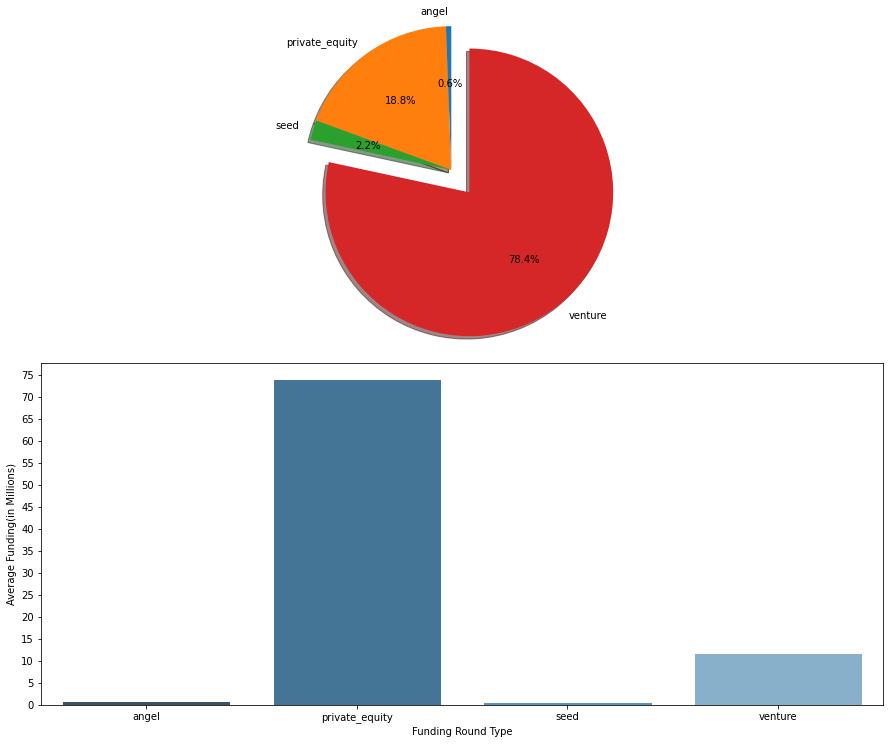

In [35]:
plt.subplots(figsize=(12, 10)) #setting size of figure
#sns.set(style="whitegrid")
plt.subplot(2,1,1)#1st subplot
#code for bar chart - ignore
#sns.barplot(x='funding_round_type' ,y ='percentage' ,data= group1, palette="Blues_d").set(ylabel= 'Fraction/Percentage of total investments' ,xlabel = '')
#plt.ylim(0, 80)

explode = (0, 0, 0, 0.2)  #parameters for highlighting or seperating venture pie for better visualization
plt.pie(group1.total_funding,explode= explode , labels=group1.funding_round_type, autopct='%1.1f%%', shadow=True,startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.subplot(2,1,2) #2nd subplot
sns.set(style="whitegrid")
sns.barplot(x='funding_round_type' ,y ='average_funding_millions' ,data= group, palette="Blues_d").set(xlabel ='Funding Round Type' , ylabel= 'Average Funding(in Millions)')
plt.yticks(np.arange(0, 80, step=5)) 
plt.show()

### PLOT 2

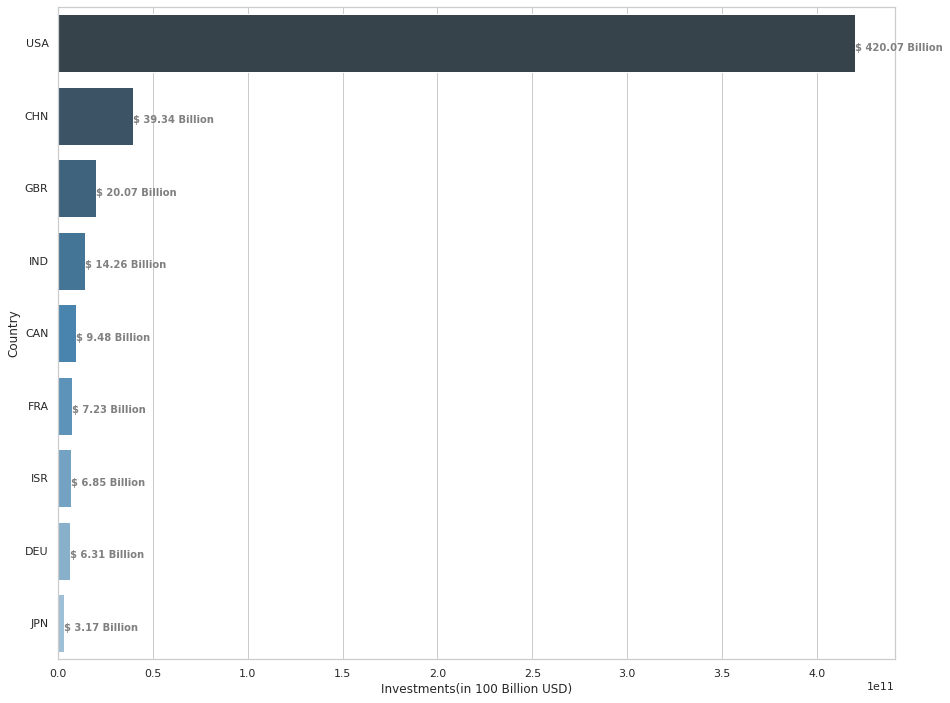

In [36]:
top_countries = top9.reset_index()


fig, ax = plt.subplots(figsize=(15,12))
sns.set(style = 'whitegrid')# setting style of plot
#sns.barplot(x = 'total_funding' , y ='country_code' , data = top_countries ,hue = 'English Speaking').set(xlabel ='Investments(in Billion USD)' , ylabel= 'Country')
sns.barplot(x = 'total_funding' , y ='country_code' , data = top_countries,palette="Blues_d" ).set(xlabel ='Investments(in 100 Billion USD)' , ylabel= 'Country')
#to get values next to bar plots
for i in ax.patches:
    ax.text(i.get_width()+500, i.get_y()+0.5, '$ ' + str(round((i.get_width())/1000000000, 2))+ ' Billion',
            fontsize=10, fontweight='bold', color='grey')
plt.show()

#### The below code is written to differentiate between English speaking and non english speaking countries
THIS CODE WILL FAIL TO RUN IF THE TOP 9 COUNTRIES CHANGE.PLEASE REFER TO THE ABOVE CHART IN THAT CASE 

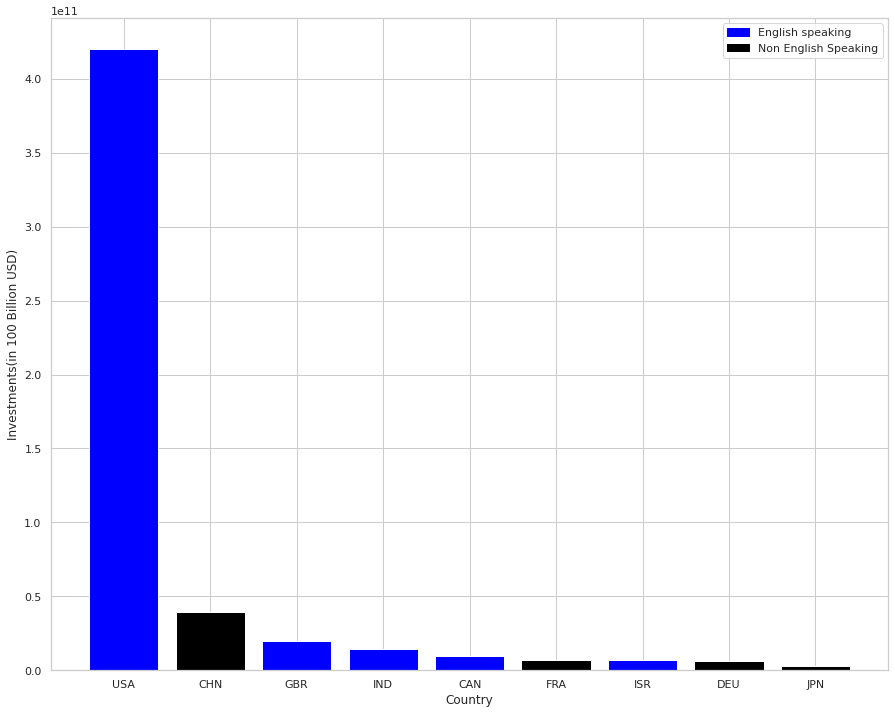

In [37]:

import matplotlib.patches as mpatches
top_countries = top9.reset_index()
#adding feature to differentiate english speaking countries from others
df = pd.DataFrame({'country_code':['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'], 
                    'English Speaking':['Yes','No','Yes','Yes','Yes','No','Yes','No','No'], 
                    }) 
top_countries = top_countries.merge(df , how = 'left' , on ='country_code')

fig, ax = plt.subplots(figsize=(15,12))

colors = {'Yes':'blue', 'No':'black'}

ax.bar(top_countries['country_code'], top_countries['total_funding'], color=top_countries['English Speaking'].apply(lambda x: colors[x]))
plt.ylabel('Investments(in 100 Billion USD)')
plt.xlabel('Country')

blue_patch = mpatches.Patch(color='blue', label='English speaking')
black_patch = mpatches.Patch(color='black', label='Non English Speaking')
plt.legend(handles=[blue_patch, black_patch])


plt.show()

### PLOT 3

In [0]:
#formating data to make it easier to plot
df1 = US.sort_values(by ='Investments_Count' ,ascending= False ).iloc[:3,:]
df1['Country'] = 'USA'
df2 = GB.sort_values(by ='Investments_Count' ,ascending= False ).iloc[:3,:]
df2['Country'] = 'GBR'
df3 = IN.sort_values(by ='Investments_Count' ,ascending= False ).iloc[:3,:]
df3['Country'] = 'IND'
df_plot = df1.append(df2).append(df3)
#pi = df_plot.pivot_table(values= 'Investments_Count' ,columns= 'Country' , index= 'main_sector' ,aggfunc= sum ,fill_value=0)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


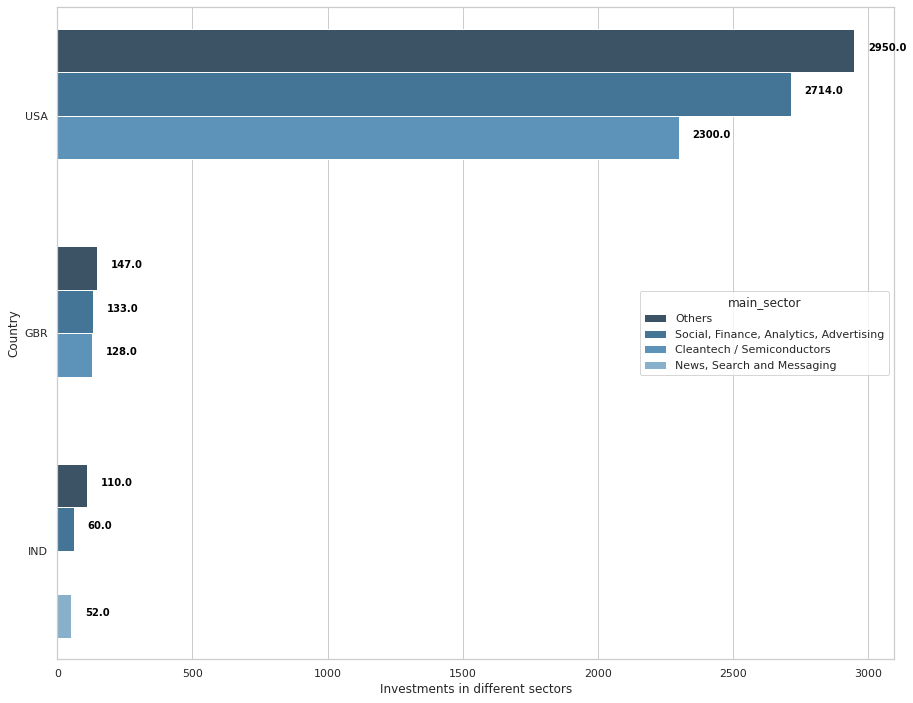

In [39]:
fig, ax = plt.subplots(figsize=(15,12))
sns.set(style = 'whitegrid')
sns.barplot(x = 'Investments_Count' ,y ='Country',data =  df_plot ,hue = 
            'main_sector' ,palette= 'Blues_d').set(
                xlabel ='Investments in different sectors' , ylabel= 'Country')
#to get values next to bar plots(THIS WILL THROW WARNINGS , WHICH IS IGNORED)
for i in ax.patches:
    ax.text(i.get_width()+50, i.get_y()+0.1, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='black')
plt.show()